# 1) Import the necessary packages

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 2) Loading the Admission Table 

In [4]:
data_AdmissionsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsCorePopulatedTable.txt",sep="\t")
data_AdmissionsCorePopulatedTable.head(10)

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160
5,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,5,2008-04-12 23:17:33.217,2008-04-16 03:22:35.737
6,EB1C36B1-0697-4145-95EE-0B0C44943339,1,1995-12-04 16:01:07.700,1995-12-17 22:59:46.223
7,EB1C36B1-0697-4145-95EE-0B0C44943339,2,2001-08-02 05:05:13.547,2001-08-16 02:35:48.323
8,EB1C36B1-0697-4145-95EE-0B0C44943339,3,2009-11-15 09:31:16.750,2009-12-01 06:49:13.053
9,F5F37898-D271-4D68-9C0E-18B1184411C6,1,1989-03-15 16:32:19.170,1989-03-19 07:04:55.640


In [5]:
data_AdmissionsCorePopulatedTable.describe()

,AdmissionID
count,361760.000000
mean,2.629293
std,1.509341
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,12.000000


In [6]:
data_AdmissionsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361760 entries, 0 to 361759
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PatientID           361760 non-null  object
 1   AdmissionID         361760 non-null  int64 
 2   AdmissionStartDate  361760 non-null  object
 3   AdmissionEndDate    361760 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB


In [7]:
data_AdmissionsCorePopulatedTable.shape

(361760, 4)

In [8]:
data_AdmissionsCorePopulatedTable.size

1447040

# 3) Adding a new column " AdmissionDuration" in this table

In [9]:
data_AdmissionsCorePopulatedTable['AdmissionEndDate']=pd.to_datetime(data_AdmissionsCorePopulatedTable['AdmissionEndDate']).dt.date

In [10]:
data_AdmissionsCorePopulatedTable['AdmissionStartDate']=pd.to_datetime(data_AdmissionsCorePopulatedTable['AdmissionStartDate']).dt.date

In [11]:
data_AdmissionsCorePopulatedTable.head(5)

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23,2011-03-28
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10,1974-02-16
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22,1991-05-29
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26,1995-02-28
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17,2005-04-04


In [12]:
data_AdmissionsCorePopulatedTable['AdmissionDuration']=(data_AdmissionsCorePopulatedTable['AdmissionEndDate']-data_AdmissionsCorePopulatedTable['AdmissionStartDate'])

In [13]:
data_AdmissionsCorePopulatedTable.head(10)

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate,AdmissionDuration
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23,2011-03-28,5 days
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10,1974-02-16,6 days
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22,1991-05-29,7 days
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26,1995-02-28,2 days
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17,2005-04-04,18 days
5,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,5,2008-04-12,2008-04-16,4 days
6,EB1C36B1-0697-4145-95EE-0B0C44943339,1,1995-12-04,1995-12-17,13 days
7,EB1C36B1-0697-4145-95EE-0B0C44943339,2,2001-08-02,2001-08-16,14 days
8,EB1C36B1-0697-4145-95EE-0B0C44943339,3,2009-11-15,2009-12-01,16 days
9,F5F37898-D271-4D68-9C0E-18B1184411C6,1,1989-03-15,1989-03-19,4 days


In [14]:
data_AdmissionsCorePopulatedTable.shape

(361760, 5)

# 4) Check for the duplicate rows in the column and drop if necessary

In [15]:
data_AdmissionsCorePopulatedTable.duplicated(subset=["PatientID","AdmissionID","AdmissionDuration"],keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
361755    False
361756    False
361757    False
361758    False
361759    False
Length: 361760, dtype: bool

In [16]:
data_AdmissionsCorePopulatedTable.PatientID.count()

361760

In [17]:
data_AdmissionsCorePopulatedTable=data_AdmissionsCorePopulatedTable.drop_duplicates(subset=["PatientID","AdmissionID","AdmissionDuration"],keep='first')

In [18]:
data_AdmissionsCorePopulatedTable.PatientID.count()

361760

In [19]:
data_AdmissionsCorePopulatedTable=data_AdmissionsCorePopulatedTable.drop(columns=['AdmissionStartDate','AdmissionEndDate'],axis=1)
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionDuration
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,5 days
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,6 days
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,7 days
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,2 days
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,18 days


In [20]:
data_AdmissionsCorePopulatedTable.PatientID.unique()

array(['9380F9E3-1927-42F3-9731-03A74D4E4C6B',
       '0A89658C-C739-45CA-9BF1-CBDDDFB922C0',
       'EB1C36B1-0697-4145-95EE-0B0C44943339', ...,
       'B90062A9-4D85-4A9E-A493-4F2AFFBB8808',
       'DB495784-37B2-4185-8D66-B76E8374099D',
       'B7A09A1C-3648-4E28-A2A2-6B202E3BC39C'], dtype=object)

In [21]:
data_AdmissionsCorePopulatedTable.shape

(361760, 3)

In [22]:
data_AdmissionsCorePopulatedTable.size

1085280

In [23]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,AdmissionDuration
0,0,0,0


# 5)Loading the Admission Diagnosis Table

In [24]:
data_AdmissionsDiagnosesCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsDiagnosesCorePopulatedTable.txt",sep='\t')
data_AdmissionsDiagnosesCorePopulatedTable.head(6)

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,3,F80.1,Expressive language disorder
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,4,R04.81,Acute idiopathic pulmonary hemorrhage in infants
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,5,I36,Nonrheumatic tricuspid valve disorders
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,1,H16.43,Localized vascularization of cornea
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,2,M05.161,Rheumatoid lung disease with rheumatoid arthri...
5,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,3,M06.011,Rheumatoid arthritis without rheumatoid factor...


In [25]:
data_AdmissionsDiagnosesCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361760 entries, 0 to 361759
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   PatientID                    361760 non-null  object
 1   AdmissionID                  361760 non-null  int64 
 2   PrimaryDiagnosisCode         361760 non-null  object
 3   PrimaryDiagnosisDescription  361760 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB


In [26]:
data_AdmissionsDiagnosesCorePopulatedTable.describe()

,AdmissionID
count,361760.000000
mean,2.629293
std,1.509341
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,12.000000


In [27]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(361760, 4)

In [28]:
data_AdmissionsDiagnosesCorePopulatedTable.PatientID.count()

361760

# 6) Check for the duplicate rows and drop if necessary

In [29]:
data_AdmissionsDiagnosesCorePopulatedTable.duplicated(subset=["PatientID","AdmissionID","PrimaryDiagnosisCode","PrimaryDiagnosisDescription"],keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
361755    False
361756    False
361757    False
361758    False
361759    False
Length: 361760, dtype: bool

In [30]:
data_AdmissionsDiagnosesCorePopulatedTable=data_AdmissionsDiagnosesCorePopulatedTable.drop_duplicates(subset=["PatientID","AdmissionID","PrimaryDiagnosisCode","PrimaryDiagnosisDescription"],keep='first')

In [31]:
data_AdmissionsDiagnosesCorePopulatedTable.PatientID.count()

361760

In [32]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(361760, 4)

In [33]:
data_AdmissionsDiagnosesCorePopulatedTable.size

1447040

In [34]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0


# 7) Merging Admission Core Table and Admission Diagnosis Table to generate Admission Group

In [35]:
data_AdmissionsCorePopulatedTable.dtypes

PatientID                     object
AdmissionID                    int64
AdmissionDuration    timedelta64[ns]
dtype: object

In [36]:
data_AdmissionsDiagnosesCorePopulatedTable.dtypes

PatientID                      object
AdmissionID                     int64
PrimaryDiagnosisCode           object
PrimaryDiagnosisDescription    object
dtype: object

In [37]:
data_AdmissionsCorePopulatedTable.sort_values(by=['PatientID','AdmissionID'])

,PatientID,AdmissionID,AdmissionDuration
320049,0000585C-5C9D-49BD-8F9E-41345464F832,1,10 days
320050,0000585C-5C9D-49BD-8F9E-41345464F832,2,13 days
125111,00005E17-D776-4260-8566-3BF18422A777,1,7 days
125112,00005E17-D776-4260-8566-3BF18422A777,2,5 days
32930,00008B98-12EC-484A-A730-788707EB72C8,1,13 days
...,...,...,...
247473,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,2,8 days
247474,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,3,13 days
247475,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,4,2 days
140311,FFFFA309-DD78-4DEE-8082-921B734062C2,1,11 days


In [38]:
data_AdmissionsDiagnosesCorePopulatedTable.sort_values(by=['PatientID','AdmissionID'],ascending=True)

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
320049,0000585C-5C9D-49BD-8F9E-41345464F832,1,O03.33,Metabolic disorder following incomplete sponta...
320050,0000585C-5C9D-49BD-8F9E-41345464F832,2,O98.612,"Protozoal diseases complicating pregnancy, sec..."
125111,00005E17-D776-4260-8566-3BF18422A777,1,C05.0,Malignant neoplasm of hard palate
125112,00005E17-D776-4260-8566-3BF18422A777,2,C02.1,Malignant neoplasm of border of tongue
32930,00008B98-12EC-484A-A730-788707EB72C8,1,C93.11,"Chronic myelomonocytic leukemia, in remission"
...,...,...,...,...
247473,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,2,M36,Systemic disorders of connective tissue in dis...
247474,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,3,M1A.35,"Chronic gout due to renal impairment, hip"
247475,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,4,M06.262,"Rheumatoid bursitis, left knee"
140311,FFFFA309-DD78-4DEE-8082-921B734062C2,1,E09.65,Drug or chemical induced diabetes mellitus wit...


In [39]:
data_Admissions_Core_Diagnoses_Merge=data_AdmissionsCorePopulatedTable.merge(data_AdmissionsDiagnosesCorePopulatedTable,how='outer',on=['PatientID','AdmissionID'])
data_Admissions_Core_Diagnoses_Merge.head()

,PatientID,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,5 days,M11.07,"Hydroxyapatite deposition disease, ankle and foot"
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,6 days,C13.2,Malignant neoplasm of posterior wall of hypoph...
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,7 days,G30,Alzheimer's disease
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,2 days,H67.2,"Otitis media in diseases classified elsewhere,..."
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,18 days,M50.1,Cervical disc disorder with radiculopathy


In [40]:
data_Admissions_Core_Diagnoses_Merge.shape

(361760, 5)

In [41]:
data_Admissions_Core_Diagnoses_Merge.head(15)

,PatientID,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,5 days,M11.07,"Hydroxyapatite deposition disease, ankle and foot"
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,6 days,C13.2,Malignant neoplasm of posterior wall of hypoph...
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,7 days,G30,Alzheimer's disease
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,2 days,H67.2,"Otitis media in diseases classified elsewhere,..."
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,18 days,M50.1,Cervical disc disorder with radiculopathy
5,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,5,4 days,C79.11,Secondary malignant neoplasm of bladder
6,EB1C36B1-0697-4145-95EE-0B0C44943339,1,13 days,C71.2,Malignant neoplasm of temporal lobe
7,EB1C36B1-0697-4145-95EE-0B0C44943339,2,14 days,E09.359,Drug or chemical induced diabetes mellitus wit...
8,EB1C36B1-0697-4145-95EE-0B0C44943339,3,16 days,C16.2,Malignant neoplasm of body of stomach
9,F5F37898-D271-4D68-9C0E-18B1184411C6,1,4 days,E11.5,Type 2 diabetes mellitus with circulatory comp...


In [42]:
data_Admissions_Core_Diagnoses_Merge.PatientID.count()

361760

In [43]:
data_Admissions_Core_Diagnoses_Merge.shape

(361760, 5)

In [44]:
data_Admissions_Core_Diagnoses_Merge.size

1808800

In [45]:
data_Admissions_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0,0


In [46]:
data_Admissions_Core_Diagnoses_Merge.describe()

,AdmissionID,AdmissionDuration
count,361760.000000,361760
mean,2.629293,11 days 00:07:11.331269349
std,1.509341,5 days 05:08:54.272681811
min,1.000000,2 days 00:00:00
25%,1.000000,7 days 00:00:00
50%,2.000000,11 days 00:00:00
75%,4.000000,15 days 00:00:00
max,12.000000,20 days 00:00:00


In [47]:
data_Admissions_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361760 entries, 0 to 361759
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   PatientID                    361760 non-null  object         
 1   AdmissionID                  361760 non-null  int64          
 2   AdmissionDuration            361760 non-null  timedelta64[ns]
 3   PrimaryDiagnosisCode         361760 non-null  object         
 4   PrimaryDiagnosisDescription  361760 non-null  object         
dtypes: int64(1), object(3), timedelta64[ns](1)
memory usage: 16.6+ MB


# 8) Loading the Patient Table

In [48]:
data_PatientCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientCorePopulatedTable.txt",sep="\t")
data_PatientCorePopulatedTable.head(20)

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,2.17
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67
5,5C043111-3F94-44BC-A889-97D44ACCC7F6,Female,1974-09-25 18:38:02.440,African American,Married,English,2.57
6,0A10A379-05B1-438B-84A0-18B4D1AE2615,Female,1986-10-23 18:07:05.173,Asian,Married,Icelandic,14.26
7,4BE9DA70-090C-45D9-BB34-C9FE07883BD9,Female,1988-04-07 13:26:59.347,White,Married,English,11.03
8,DED90E65-5B8E-497C-9A17-0679C1DA3B6D,Male,1940-09-29 16:37:18.737,African American,Married,English,11.86
9,67744717-0461-45C5-B85A-D7355EFAF6A1,Female,1967-07-17 12:35:46.713,White,Single,English,5.35


In [49]:
data_PatientCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   PatientID                                100000 non-null  object 
 1   PatientGender                            100000 non-null  object 
 2   PatientDateOfBirth                       100000 non-null  object 
 3   PatientRace                              100000 non-null  object 
 4   PatientMaritalStatus                     100000 non-null  object 
 5   PatientLanguage                          100000 non-null  object 
 6   PatientPopulationPercentageBelowPoverty  100000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


In [50]:
data_PatientCorePopulatedTable.describe()

,PatientPopulationPercentageBelowPoverty
count,100000.000000
mean,21.557870
std,23.249851
min,0.000000
25%,11.980000
50%,15.060000
75%,18.150000
max,100.000000


In [51]:
data_PatientCorePopulatedTable.shape

(100000, 7)

# 9) Check for the duplicate rows in this table and drop if necessary

In [52]:
data_PatientCorePopulatedTable.duplicated(subset=['PatientID','PatientGender','PatientMaritalStatus','PatientDateOfBirth'],keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [53]:
data_PatientCorePopulatedTable.PatientID.count()

100000

# 10) Removing the columns not required for model training

In [54]:
data_PatientCorePopulatedTable=data_PatientCorePopulatedTable.drop(columns=['PatientLanguage','PatientPopulationPercentageBelowPoverty'],axis=1)
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married


In [55]:
data_PatientCorePopulatedTable.PatientID.count()

100000

In [56]:
data_PatientCorePopulatedTable.shape

(100000, 5)

In [57]:
data_PatientCorePopulatedTable.size

500000

In [58]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,0,0,0,0,0


In [59]:


data_PatientCorePopulatedTable.sort_values(by=['PatientID'],ascending=True)

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
88450,0000585C-5C9D-49BD-8F9E-41345464F832,Female,1984-04-28 23:40:27.293,White,Single
34632,00005E17-D776-4260-8566-3BF18422A777,Female,1924-08-02 09:42:39.840,White,Unknown
9238,00008B98-12EC-484A-A730-788707EB72C8,Male,1948-06-11 09:06:23.503,White,Divorced
78349,0001452D-730F-45E4-A896-3F95DB98849D,Female,1948-07-28 02:33:01.517,White,Married
64581,0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6,Male,1987-02-07 02:56:53.157,Asian,Single
...,...,...,...,...,...
79794,FFFDE252-E3DC-4909-AEAD-EFC88A90EECE,Male,1965-07-28 18:37:03.817,Unknown,Single
12007,FFFE2CE0-297E-4134-8821-D6AA79468A9E,Female,1965-02-06 21:47:31.713,White,Married
76666,FFFE58EA-FE3E-4631-85F7-CFAB1FCAEE0A,Female,1963-11-29 20:01:08.360,White,Married
68370,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,Female,1966-02-01 18:25:14.407,White,Single


# 11) Merging Patient Table with Admission group to generate Patient group

In [60]:
data_Admissions_Core_Diagnoses_Merge['PatientID'].count()

361760

In [61]:
data_PatientCorePopulatedTable['PatientID'].count()

100000

In [62]:
data_Patients_Core_Admission_Core_Diagnoses_Merge=data_PatientCorePopulatedTable.merge(data_Admissions_Core_Diagnoses_Merge,indicator=False,how='outer')
data_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(361760, 9)

In [63]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.head(15)

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,1,10 days,O10.13,Pre-existing hypertensive heart disease compli...
1,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,2,12 days,E74.1,Disorders of fructose metabolism
2,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,3,16 days,C91.02,"Acute lymphoblastic leukemia, in relapse"
3,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,1,12 days,M10.34,"Gout due to renal impairment, hand"
4,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,2,17 days,F44.4,Conversion disorder with motor symptom or deficit
5,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,3,16 days,I39,Endocarditis and heart valve disorders in dise...
6,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,4,18 days,C92.00,"Acute myeloblastic leukemia, not having achiev..."
7,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,5,16 days,O99.613,Diseases of the digestive system complicating ...
8,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,1,5 days,C90,Multiple myeloma and malignant plasma cell neo...
9,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,2,6 days,F23,Brief psychotic disorder


In [64]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,0,0,0,0,0


In [65]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.head(20)

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,1,10 days,O10.13,Pre-existing hypertensive heart disease compli...
1,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,2,12 days,E74.1,Disorders of fructose metabolism
2,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,3,16 days,C91.02,"Acute lymphoblastic leukemia, in relapse"
3,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,1,12 days,M10.34,"Gout due to renal impairment, hand"
4,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,2,17 days,F44.4,Conversion disorder with motor symptom or deficit
5,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,3,16 days,I39,Endocarditis and heart valve disorders in dise...
6,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,4,18 days,C92.00,"Acute myeloblastic leukemia, not having achiev..."
7,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,5,16 days,O99.613,Diseases of the digestive system complicating ...
8,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,1,5 days,C90,Multiple myeloma and malignant plasma cell neo...
9,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,2,6 days,F23,Brief psychotic disorder


In [66]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.PatientID.count()

361760

In [67]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(361760, 9)

In [68]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.size

3255840

In [69]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionID,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0,0,0,0,0,0


In [70]:
data_PatientCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PatientID             100000 non-null  object
 1   PatientGender         100000 non-null  object
 2   PatientDateOfBirth    100000 non-null  object
 3   PatientRace           100000 non-null  object
 4   PatientMaritalStatus  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [71]:
data_PatientCorePopulatedTable.describe()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
count,100000,100000,100000,100000,100000
unique,100000,2,100000,4,6
top,03DAFF5F-D5FC-4C32-937E-2D7AAEFCC959,Female,1989-09-20 05:08:24.607,White,Married
freq,1,52000,1,49000,45000


# 12) Loading the Labs Table

In [72]:
data_LabsCorePopulatedTable=pd.read_csv('/content/drive/My Drive/Colab Notebooks/LabsCorePopulatedTable.txt',sep='\t',nrows=90000)

In [73]:
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000


In [74]:
data_LabsCorePopulatedTable.shape

(90000, 6)

In [75]:
data_LabsCorePopulatedTable.PatientID.count()

90000

In [76]:
data_LabsCorePopulatedTable.shape

(90000, 6)

In [77]:
data_LabsCorePopulatedTable.size

540000

In [78]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,0,0,0,0,0,0


In [79]:
data_LabsCorePopulatedTable=data_LabsCorePopulatedTable.drop(columns=['LabUnits','LabDateTime'],axis=1)
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8


In [80]:
data_LabsCorePopulatedTable.describe()

,AdmissionID,LabValue
count,90000.000000,90000.000000
mean,2.579178,34.983740
std,1.442035,58.812856
min,1.000000,0.000000
25%,1.000000,3.300000
50%,2.000000,10.500000
75%,3.000000,37.800000
max,7.000000,449.800000


In [81]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PatientID    90000 non-null  object 
 1   AdmissionID  90000 non-null  int64  
 2   LabName      90000 non-null  object 
 3   LabValue     90000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [82]:
Counter(data_LabsCorePopulatedTable.LabName) 

Counter({'CBC: ABSOLUTE LYMPHOCYTES': 2564,
         'CBC: ABSOLUTE NEUTROPHILS': 2521,
         'CBC: BASOPHILS': 2577,
         'CBC: EOSINOPHILS': 2580,
         'CBC: HEMATOCRIT': 2554,
         'CBC: HEMOGLOBIN': 2532,
         'CBC: LYMPHOCYTES': 2532,
         'CBC: MCH': 2578,
         'CBC: MCHC': 2602,
         'CBC: MEAN CORPUSCULAR VOLUME': 2560,
         'CBC: MONOCYTES': 2597,
         'CBC: NEUTROPHILS': 2585,
         'CBC: PLATELET COUNT': 2590,
         'CBC: RDW': 2611,
         'CBC: RED BLOOD CELL COUNT': 2561,
         'CBC: WHITE BLOOD CELL COUNT': 2599,
         'METABOLIC: ALBUMIN': 2578,
         'METABOLIC: ALK PHOS': 2541,
         'METABOLIC: ALT/SGPT': 2566,
         'METABOLIC: ANION GAP': 2596,
         'METABOLIC: AST/SGOT': 2554,
         'METABOLIC: BILI TOTAL': 2585,
         'METABOLIC: BUN': 2544,
         'METABOLIC: CALCIUM': 2537,
         'METABOLIC: CARBON DIOXIDE': 2602,
         'METABOLIC: CHLORIDE': 2553,
         'METABOLIC: CREATININE': 

# 13) Use one-hot encoding to find out the different Lab Names




In [83]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder 

In [84]:
pd.get_dummies(data_LabsCorePopulatedTable.LabName) 

,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [85]:
Counter(data_LabsCorePopulatedTable.LabName) 

Counter({'CBC: ABSOLUTE LYMPHOCYTES': 2564,
         'CBC: ABSOLUTE NEUTROPHILS': 2521,
         'CBC: BASOPHILS': 2577,
         'CBC: EOSINOPHILS': 2580,
         'CBC: HEMATOCRIT': 2554,
         'CBC: HEMOGLOBIN': 2532,
         'CBC: LYMPHOCYTES': 2532,
         'CBC: MCH': 2578,
         'CBC: MCHC': 2602,
         'CBC: MEAN CORPUSCULAR VOLUME': 2560,
         'CBC: MONOCYTES': 2597,
         'CBC: NEUTROPHILS': 2585,
         'CBC: PLATELET COUNT': 2590,
         'CBC: RDW': 2611,
         'CBC: RED BLOOD CELL COUNT': 2561,
         'CBC: WHITE BLOOD CELL COUNT': 2599,
         'METABOLIC: ALBUMIN': 2578,
         'METABOLIC: ALK PHOS': 2541,
         'METABOLIC: ALT/SGPT': 2566,
         'METABOLIC: ANION GAP': 2596,
         'METABOLIC: AST/SGOT': 2554,
         'METABOLIC: BILI TOTAL': 2585,
         'METABOLIC: BUN': 2544,
         'METABOLIC: CALCIUM': 2537,
         'METABOLIC: CARBON DIOXIDE': 2602,
         'METABOLIC: CHLORIDE': 2553,
         'METABOLIC: CREATININE': 

# 14) Merging Lab Table with Patient group to generate Lab group

In [86]:
data=data_LabsCorePopulatedTable.merge(data_Patients_Core_Admission_Core_Diagnoses_Merge,indicator=False,how='outer')
data.head(20)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
5,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,URINALYSIS: RED BLOOD CELLS,0.5,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
6,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: WHITE BLOOD CELL COUNT,9.2,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
7,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,URINALYSIS: SPECIFIC GRAVITY,1.0,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
8,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: NEUTROPHILS,7.0,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"
9,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: POTASSIUM,3.0,Male,1950-04-28 05:47:36.220,Unknown,Married,14 days,H30.811,"Harada's disease, right eye"


In [87]:
data.describe()

,AdmissionID,LabValue,AdmissionDuration
count,451446.000000,90000.000000,451446
mean,2.619341,34.983740,11 days 10:14:40.849536821
std,1.496332,58.812856,5 days 04:09:29.443364348
min,1.000000,0.000000,2 days 00:00:00
25%,1.000000,3.300000,7 days 00:00:00
50%,2.000000,10.500000,12 days 00:00:00
75%,3.000000,37.800000,16 days 00:00:00
max,12.000000,449.800000,20 days 00:00:00


In [88]:
data.shape

(451446, 11)

In [89]:
data.PatientID.count()

451446

In [90]:
data.size

4965906

In [91]:
data.columns

Index(['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'PatientGender',
       'PatientDateOfBirth', 'PatientRace', 'PatientMaritalStatus',
       'AdmissionDuration', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription'],
      dtype='object')

In [92]:
label_encoder=LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_LabsCorePopulatedTable.LabName)
print(integer_encoded) 

[18 10 27 ...  7 33 28]



# 15) Exploratory Data Analysis(EDA) on Final Lab Group data

In [93]:
data.shape

(451446, 11)

In [94]:
data.size

4965906

In [95]:
data.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,361446,361446,0,0,0,0,0,0,0


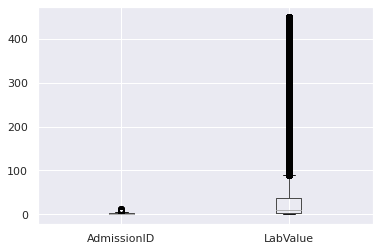

In [96]:
data.boxplot();

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451446 entries, 0 to 451445
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   PatientID                    451446 non-null  object         
 1   AdmissionID                  451446 non-null  int64          
 2   LabName                      90000 non-null   object         
 3   LabValue                     90000 non-null   float64        
 4   PatientGender                451446 non-null  object         
 5   PatientDateOfBirth           451446 non-null  object         
 6   PatientRace                  451446 non-null  object         
 7   PatientMaritalStatus         451446 non-null  object         
 8   AdmissionDuration            451446 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode         451446 non-null  object         
 10  PrimaryDiagnosisDescription  451446 non-null  object         
dtypes: float64(1)

In [98]:
data.describe()

,AdmissionID,LabValue,AdmissionDuration
count,451446.000000,90000.000000,451446
mean,2.619341,34.983740,11 days 10:14:40.849536821
std,1.496332,58.812856,5 days 04:09:29.443364348
min,1.000000,0.000000,2 days 00:00:00
25%,1.000000,3.300000,7 days 00:00:00
50%,2.000000,10.500000,12 days 00:00:00
75%,3.000000,37.800000,16 days 00:00:00
max,12.000000,449.800000,20 days 00:00:00


# 16) Generating Patient Age and Patient Age category columns in Lab group

In [99]:
import datetime
from datetime import date as dt

In [100]:
dt.today()

datetime.date(2020, 10, 28)

In [101]:
type(data['PatientDateOfBirth'])

pandas.core.series.Series

In [102]:
data['PatientDateOfBirth'] = pd.to_datetime(data['PatientDateOfBirth']).dt.date

In [103]:
data.tail()

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
451441,DB495784-37B2-4185-8D66-B76E8374099D,5,NaN,NaN,Female,1921-12-14,White,Married,16 days,M90.631,"Osteitis deformans in neoplastic diseases, rig..."
451442,DB495784-37B2-4185-8D66-B76E8374099D,6,NaN,NaN,Female,1921-12-14,White,Married,2 days,E09.21,Drug or chemical induced diabetes mellitus wit...
451443,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1,NaN,NaN,Female,1968-10-30,White,Unknown,12 days,C57.22,Malignant neoplasm of left round ligament
451444,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2,NaN,NaN,Female,1968-10-30,White,Unknown,12 days,C92.12,"Chronic myeloid leukemia, BCR/ABL-positive, in..."
451445,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,3,NaN,NaN,Female,1968-10-30,White,Unknown,3 days,D32.0,Benign neoplasm of cerebral meninges


In [104]:
today=dt.today()
today

datetime.date(2020, 10, 28)

In [105]:
data['PatientAge'] = data['PatientDateOfBirth'].apply(lambda x:today.year - x.year -((today.month, today.day) < (x.month, x.day)))
data.head(2)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAge
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70


# 17) Generating the PatientAgeCategory column from  PatientAge

In [106]:
data.loc[(data.PatientAge<18.0),'PatientAgeCategory']='Minor'
data.loc[(data.PatientAge>=18.0) &(data.PatientAge<=35.0),'PatientAgeCategory']='Youth'
data.loc[(data.PatientAge>35.0) &(data.PatientAge<60.0),'PatientAgeCategory']='Adults'
data.loc[(data.PatientAge>=60.0),'PatientAgeCategory']='Senior Citizen'

In [107]:
data.head(5)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAge,PatientAgeCategory
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70,Senior Citizen
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70,Senior Citizen
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70,Senior Citizen
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70,Senior Citizen
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",70,Senior Citizen


In [108]:
data.drop(columns=['PatientAge'],inplace=True)

#### Categorical variables in the Lab Group data

In [109]:
Counter(data.PatientAgeCategory)

Counter({'Adults': 169037, 'Senior Citizen': 274344, 'Youth': 8065})

In [110]:
Counter(data.PatientGender)

Counter({'Female': 230272, 'Male': 221174})

In [111]:
Counter(data.PatientRace)

Counter({'African American': 60785,
         'Asian': 104764,
         'Unknown': 54339,
         'White': 231558})

In [112]:
Counter(data.PatientMaritalStatus)

Counter({'Divorced': 47814,
         'Married': 198889,
         'Separated': 26012,
         'Single': 145661,
         'Unknown': 28550,
         'Widowed': 4520})

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451446 entries, 0 to 451445
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   PatientID                    451446 non-null  object         
 1   AdmissionID                  451446 non-null  int64          
 2   LabName                      90000 non-null   object         
 3   LabValue                     90000 non-null   float64        
 4   PatientGender                451446 non-null  object         
 5   PatientDateOfBirth           451446 non-null  object         
 6   PatientRace                  451446 non-null  object         
 7   PatientMaritalStatus         451446 non-null  object         
 8   AdmissionDuration            451446 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode         451446 non-null  object         
 10  PrimaryDiagnosisDescription  451446 non-null  object         
 11  PatientAgeCat

In [114]:
data.shape

(451446, 12)

# 18) Handle the null values present in the Lab group

In [115]:
data.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory
0,0,0,361446,361446,0,0,0,0,0,0,0,0


In [116]:
type(data)

pandas.core.frame.DataFrame

In [117]:
data.shape

(451446, 12)

In [118]:
data.fillna(value=0.0,inplace=True)

In [119]:
data.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory
0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
data.shape

(451446, 12)

# 19) Generating the new columns for Lab Values based on LabName and by retrieving the PatientID 

In [121]:
data.PatientID.unique()

array(['BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3',
       'A39144C1-FE63-4FEF-B3BA-6EFD4FF20609',
       '137279AC-626C-4FDF-8A00-0EE29F9DCC17', ...,
       'B90062A9-4D85-4A9E-A493-4F2AFFBB8808',
       'DB495784-37B2-4185-8D66-B76E8374099D',
       'B7A09A1C-3648-4E28-A2A2-6B202E3BC39C'], dtype=object)

In [122]:
data.PatientID.count()

451446

In [123]:
new=data[(data['AdmissionID'].isin([1,2,3,4,5]))]
new

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...
451440,DB495784-37B2-4185-8D66-B76E8374099D,4,0,0.0,Female,1921-12-14,White,Married,18 days,M11.022,"Hydroxyapatite deposition disease, left elbow",Senior Citizen
451441,DB495784-37B2-4185-8D66-B76E8374099D,5,0,0.0,Female,1921-12-14,White,Married,16 days,M90.631,"Osteitis deformans in neoplastic diseases, rig...",Senior Citizen
451443,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1,0,0.0,Female,1968-10-30,White,Unknown,12 days,C57.22,Malignant neoplasm of left round ligament,Adults
451444,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2,0,0.0,Female,1968-10-30,White,Unknown,12 days,C92.12,"Chronic myeloid leukemia, BCR/ABL-positive, in...",Adults


In [124]:
data=data.join(pd.get_dummies(data['LabName']).replace(0,np.nan).mul(data.LabValue,axis=0))
data.head()


,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451446 entries, 0 to 451445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      451446 non-null  object         
 1   AdmissionID                    451446 non-null  int64          
 2   LabName                        451446 non-null  object         
 3   LabValue                       451446 non-null  float64        
 4   PatientGender                  451446 non-null  object         
 5   PatientDateOfBirth             451446 non-null  object         
 6   PatientRace                    451446 non-null  object         
 7   PatientMaritalStatus           451446 non-null  object         
 8   AdmissionDuration              451446 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           451446 non-null  object         
 10  PrimaryDiagnosisDescription    451446 non-null  object  

In [126]:
data.columns

Index([                    'PatientID',                   'AdmissionID',
                             'LabName',                      'LabValue',
                       'PatientGender',            'PatientDateOfBirth',
                         'PatientRace',          'PatientMaritalStatus',
                   'AdmissionDuration',          'PrimaryDiagnosisCode',
         'PrimaryDiagnosisDescription',            'PatientAgeCategory',
                                   0.0,     'CBC: ABSOLUTE LYMPHOCYTES',
           'CBC: ABSOLUTE NEUTROPHILS',                'CBC: BASOPHILS',
                    'CBC: EOSINOPHILS',               'CBC: HEMATOCRIT',
                     'CBC: HEMOGLOBIN',              'CBC: LYMPHOCYTES',
                            'CBC: MCH',                     'CBC: MCHC',
        'CBC: MEAN CORPUSCULAR VOLUME',                'CBC: MONOCYTES',
                    'CBC: NEUTROPHILS',           'CBC: PLATELET COUNT',
                            'CBC: RDW',     'CBC: R

##### Handle the null values for the transformed Lab Group data

In [127]:
data.isna().sum().to_frame()

,0
PatientID,0
AdmissionID,0
LabName,0
LabValue,0
PatientGender,0
PatientDateOfBirth,0
PatientRace,0
PatientMaritalStatus,0
AdmissionDuration,0
PrimaryDiagnosisCode,0


In [128]:
data.fillna(value=0.0,inplace=True)

In [129]:
data.isna().sum().to_frame()

,0
PatientID,0
AdmissionID,0
LabName,0
LabValue,0
PatientGender,0
PatientDateOfBirth,0
PatientRace,0
PatientMaritalStatus,0
AdmissionDuration,0
PrimaryDiagnosisCode,0


# 20) Splitting the dataframe into train and test

- Print the values for train and test data with respect to Patient ID and Admission ID

In [130]:
from sklearn.model_selection import train_test_split

data_train, data_test= train_test_split(data, test_size=0.4,random_state=0)
print('Data Train shape = ',data_train.shape)
print('Data Test shape = ',data_test.shape)


Data Train shape =  (270867, 48)
Data Test shape =  (180579, 48)


In [131]:
data_train.head(10)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
10735,EBCCF82E-74F0-4238-9040-97B2860CD820,3,CBC: LYMPHOCYTES,4.3,Female,1964-10-11,Asian,Single,12 days,F31.31,"Bipolar disorder, current episode depressed, mild",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414513,141A19A8-6141-42E8-80A1-9EE87FC0FF53,2,0,0.0,Male,1940-07-28,Unknown,Single,18 days,O98.711,Human immunodeficiency virus [HIV] disease com...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396651,5D58E74B-533C-4773-AE08-06A631570495,1,0,0.0,Female,1945-11-04,Asian,Married,2 days,F31.7,"Bipolar disorder, currently in remission",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282177,CC0674CF-835B-47DF-AF2B-A7F0D7B722B6,2,0,0.0,Female,1981-02-28,Asian,Married,11 days,L94.5,Poikiloderma vasculare atrophicans,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26368,2117CF29-7F42-45BF-A4F2-5D0785503081,1,URINALYSIS: RED BLOOD CELLS,3.3,Female,1976-05-09,White,Divorced,17 days,E08.321,Diabetes mellitus due to underlying condition ...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,0.0
35312,292983F1-0418-407F-ACA9-5162330E6B27,3,METABOLIC: ALBUMIN,3.7,Female,1954-08-24,White,Single,5 days,H67.1,"Otitis media in diseases classified elsewhere,...",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247666,19B7576E-C7A3-4FB0-9D1B-5A6185571C20,4,0,0.0,Male,1943-06-30,White,Married,14 days,C47.12,Malignant neoplasm of peripheral nerves of lef...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13764,9856440A-051E-4667-B5B7-685272F76838,7,CBC: BASOPHILS,0.2,Male,1958-11-14,White,Married,18 days,M11.061,"Hydroxyapatite deposition disease, right knee",Senior Citizen,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37420,A84603F1-AB54-4986-B894-295E419C5674,1,URINALYSIS: WHITE BLOOD CELLS,4.0,Female,1920-03-02,White,Married,17 days,C24.8,Malignant neoplasm of overlapping sites of bil...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
428364,E80B1987-2B04-497C-8D4F-DA3591A1F458,1,0,0.0,Female,1956-02-22,Asian,Single,13 days,C40.81,Malignant neoplasm of overlapping sites of bon...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [132]:
data_test.head(10)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
111212,02BE28A9-356A-4A7A-A3D1-B9209E45BEB7,3,0,0.0,Female,1976-07-30,White,Single,15 days,C69.31,Malignant neoplasm of right choroid,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1782,B7603541-D030-494C-AF63-50CF71632299,2,CBC: RDW,15.3,Male,1969-05-28,White,Divorced,11 days,D41.22,Neoplasm of uncertain behavior of left ureter,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308351,5C7799E8-F9F0-4AFB-A704-9707900C6C02,1,0,0.0,Female,1935-06-23,Asian,Married,17 days,E75.01,Sandhoff disease,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297261,7D7AA197-8D83-40E1-AEB6-5B2BDFC14F2E,2,0,0.0,Female,1967-12-20,White,Married,17 days,J81.1,Chronic pulmonary edema,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124337,F7330688-B122-40C8-8027-87538DF2614B,1,0,0.0,Male,1924-03-25,Asian,Single,14 days,N48.32,Priapism due to disease classified elsewhere,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272312,8023C351-B7A9-44AF-AA3E-DFD3E1597FB5,3,0,0.0,Female,1956-11-23,Asian,Married,19 days,I69.123,Fluency disorder following nontraumatic intrac...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333039,D701179A-63EE-49EA-947A-CD7CBFAD56C9,4,0,0.0,Male,1948-01-27,Asian,Single,6 days,M05.472,Rheumatoid myopathy with rheumatoid arthritis ...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400063,90D322BC-A199-46C3-8978-6C7447576A87,3,0,0.0,Female,1925-01-24,White,Married,17 days,D57.211,Sickle-cell/Hb-C disease with acute chest synd...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446903,9AFD9227-4245-4F14-982E-675008664E01,2,0,0.0,Female,1961-12-10,White,Married,2 days,E83.01,Wilson's disease,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300450,3E7E3AC4-8160-4EC4-8857-0D96229C5AA4,1,0,0.0,Male,1971-09-30,Unknown,Married,18 days,A41.3,Sepsis due to Hemophilus influenzae,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
data_train.sort_values(by=['PatientID','AdmissionID'])

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
409735,0000585C-5C9D-49BD-8F9E-41345464F832,1,0,0.0,Female,1984-04-28,White,Single,10 days,O03.33,Metabolic disorder following incomplete sponta...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214797,00005E17-D776-4260-8566-3BF18422A777,1,0,0.0,Female,1924-08-02,White,Unknown,7 days,C05.0,Malignant neoplasm of hard palate,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214798,00005E17-D776-4260-8566-3BF18422A777,2,0,0.0,Female,1924-08-02,White,Unknown,5 days,C02.1,Malignant neoplasm of border of tongue,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123491,00008B98-12EC-484A-A730-788707EB72C8,1,0,0.0,Male,1948-06-11,White,Divorced,13 days,C93.11,"Chronic myelomonocytic leukemia, in remission",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123492,00008B98-12EC-484A-A730-788707EB72C8,2,0,0.0,Male,1948-06-11,White,Divorced,6 days,F45.4,Pain disorders related to psychological factors,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367056,FFFE58EA-FE3E-4631-85F7-CFAB1FCAEE0A,2,0,0.0,Female,1963-11-29,White,Married,3 days,C34.32,"Malignant neoplasm of lower lobe, left bronchu...",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337158,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,1,0,0.0,Female,1966-02-01,White,Single,7 days,M05.122,Rheumatoid lung disease with rheumatoid arthri...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337160,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,3,0,0.0,Female,1966-02-01,White,Single,13 days,M1A.35,"Chronic gout due to renal impairment, hip",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337161,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,4,0,0.0,Female,1966-02-01,White,Single,2 days,M06.262,"Rheumatoid bursitis, left knee",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
data_test.sort_values(by=['PatientID','AdmissionID'])

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
409736,0000585C-5C9D-49BD-8F9E-41345464F832,2,0,0.0,Female,1984-04-28,White,Single,13 days,O98.612,"Protozoal diseases complicating pregnancy, sec...",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123493,00008B98-12EC-484A-A730-788707EB72C8,3,0,0.0,Male,1948-06-11,White,Divorced,10 days,F12.150,Cannabis abuse with psychotic disorder with de...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123495,00008B98-12EC-484A-A730-788707EB72C8,5,0,0.0,Male,1948-06-11,White,Divorced,12 days,M05.361,Rheumatoid heart disease with rheumatoid arthr...,Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123496,00008B98-12EC-484A-A730-788707EB72C8,6,0,0.0,Male,1948-06-11,White,Divorced,19 days,F33.1,"Major depressive disorder, recurrent, moderate",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373149,0001452D-730F-45E4-A896-3F95DB98849D,1,0,0.0,Female,1948-07-28,White,Married,6 days,C34.31,"Malignant neoplasm of lower lobe, right bronch...",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246361,FFFD1B47-047D-406E-B4AC-1B98EB8597CF,1,0,0.0,Male,1968-10-24,Unknown,Married,13 days,C92.50,"Acute myelomonocytic leukemia, not having achi...",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378351,FFFDE252-E3DC-4909-AEAD-EFC88A90EECE,1,0,0.0,Male,1965-07-28,Unknown,Single,4 days,Z13.81,Encounter for screening for digestive system d...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133400,FFFE2CE0-297E-4134-8821-D6AA79468A9E,4,0,0.0,Female,1965-02-06,White,Married,14 days,H61.193,"Noninfective disorders of pinna, bilateral",Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337159,FFFF554A-83B7-4816-A5D1-B6BBA5A94DCB,2,0,0.0,Female,1966-02-01,White,Single,8 days,M36,Systemic disorders of connective tissue in dis...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
data_train.PatientID.count()

270867

In [136]:
data_test.PatientID.count()

180579

### Saving test and train data inside the system

In [137]:
data_train.to_csv('/content/drive/My Drive/Colab Notebooks/data_train.csv',sep='\t')

In [138]:
data_test.to_csv('/content/drive/My Drive/Colab Notebooks/data_test.csv',sep='\t')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451446 entries, 0 to 451445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      451446 non-null  object         
 1   AdmissionID                    451446 non-null  int64          
 2   LabName                        451446 non-null  object         
 3   LabValue                       451446 non-null  float64        
 4   PatientGender                  451446 non-null  object         
 5   PatientDateOfBirth             451446 non-null  object         
 6   PatientRace                    451446 non-null  object         
 7   PatientMaritalStatus           451446 non-null  object         
 8   AdmissionDuration              451446 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           451446 non-null  object         
 10  PrimaryDiagnosisDescription    451446 non-null  object  

In [140]:
data.head(2)

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
data.shape

(451446, 48)

In [142]:
data.size

21669408

# 21) Split the dataset based on the Patient Gender

In [143]:
data1=data[data['PatientGender']=='Male'] 
data1.head()

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,Male,1950-04-28,Unknown,Married,14 days,H30.811,"Harada's disease, right eye",Senior Citizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
data1.shape

(221174, 48)

In [145]:
data1.size

10616352

In [146]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221174 entries, 0 to 451436
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      221174 non-null  object         
 1   AdmissionID                    221174 non-null  int64          
 2   LabName                        221174 non-null  object         
 3   LabValue                       221174 non-null  float64        
 4   PatientGender                  221174 non-null  object         
 5   PatientDateOfBirth             221174 non-null  object         
 6   PatientRace                    221174 non-null  object         
 7   PatientMaritalStatus           221174 non-null  object         
 8   AdmissionDuration              221174 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           221174 non-null  object         
 10  PrimaryDiagnosisDescription    221174 non-null  object  

In [147]:
data2=data[data['PatientGender']=='Female'] 
data2.head()

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
781,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: ALBUMIN,3.0,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,CBC: MCH,32.9,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: AST/SGOT,28.9,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,CBC: BASOPHILS,0.1,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: GLUCOSE,123.2,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
data2.shape

(230272, 48)

In [149]:
data2.size

11053056

In [150]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230272 entries, 781 to 451445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      230272 non-null  object         
 1   AdmissionID                    230272 non-null  int64          
 2   LabName                        230272 non-null  object         
 3   LabValue                       230272 non-null  float64        
 4   PatientGender                  230272 non-null  object         
 5   PatientDateOfBirth             230272 non-null  object         
 6   PatientRace                    230272 non-null  object         
 7   PatientMaritalStatus           230272 non-null  object         
 8   AdmissionDuration              230272 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           230272 non-null  object         
 10  PrimaryDiagnosisDescription    230272 non-null  object

## Saving the dataframes of MALE and FEMALE inside the system

In [151]:
data1.to_csv("/content/drive/My Drive/Colab Notebooks/Male_EHR_Lab_Group_Data.csv",sep='\t')

In [152]:
data2.to_csv("/content/drive/My Drive/Colab Notebooks/Female_EHR_Lab_Group_Data.csv",sep='\t')

# Performing Data Modeling on dataframe MALE

# 22) Using Label Encoding to convert categorical data into numericals

In [153]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

data1['PatientID']=enc.fit_transform(data1['PatientID'])
data1['PatientGender']=enc.fit_transform(data1['PatientGender'])
data1['PatientMaritalStatus']=enc.fit_transform(data1['PatientMaritalStatus'])
data1['PatientRace']=enc.fit_transform(data1['PatientRace'])
data1['PatientAgeCategory']=enc.fit_transform(data1['PatientAgeCategory'])

In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221174 entries, 0 to 451436
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      221174 non-null  int64          
 1   AdmissionID                    221174 non-null  int64          
 2   LabName                        221174 non-null  object         
 3   LabValue                       221174 non-null  float64        
 4   PatientGender                  221174 non-null  int64          
 5   PatientDateOfBirth             221174 non-null  object         
 6   PatientRace                    221174 non-null  int64          
 7   PatientMaritalStatus           221174 non-null  int64          
 8   AdmissionDuration              221174 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           221174 non-null  object         
 10  PrimaryDiagnosisDescription    221174 non-null  object  

### Displaying the encoded values of the categorical features

In [155]:
Counter(data1.PatientAgeCategory)

Counter({0: 82385, 1: 135082, 2: 3707})

In [156]:
Counter(data1.PatientGender)

Counter({0: 221174})

In [157]:
Counter(data1.PatientRace)

Counter({0: 31271, 1: 45887, 2: 26662, 3: 117354})

In [158]:
Counter(data1.PatientMaritalStatus)

Counter({0: 23356, 1: 102602, 2: 13561, 3: 68713, 4: 10261, 5: 2681})

# 23) Finding correlations between different columns in Lab group and generating correlation matrix

In [159]:
corr_male=data1.corr()
corr_male

,PatientID,AdmissionID,LabValue,PatientGender,PatientRace,PatientMaritalStatus,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
PatientID,1.000000,-0.011160,0.029136,NaN,0.019962,-0.025057,0.041694,NaN,0.006573,0.008765,0.006888,0.007684,0.009631,0.007689,0.009021,0.009395,0.008918,0.009445,0.009790,0.006815,0.010628,0.008297,0.009138,0.008783,0.010624,0.007842,0.008348,0.011444,0.007889,0.008057,0.008440,0.008721,0.010840,0.008069,0.008414,0.008000,0.007838,0.008997,0.008878,0.007230,0.008007,0.008722,0.008264
AdmissionID,-0.011160,1.000000,-0.001780,NaN,0.009139,-0.026282,0.100602,NaN,-0.000804,0.000006,-0.002267,-0.000045,0.000595,-0.000495,0.001117,0.001891,0.001839,-0.002145,0.000188,-0.003288,-0.001776,-0.001553,-0.000899,-0.002748,-0.001257,0.000604,-0.002099,-0.000611,0.000453,0.000228,-0.002757,-0.000373,-0.001622,0.001161,-0.000678,-0.000114,0.000488,0.000116,-0.001183,-0.000339,-0.000424,-0.001121,-0.001793
LabValue,0.029136,-0.001780,1.000000,NaN,0.061565,-0.024640,-0.003607,NaN,0.046866,0.158535,-0.015544,-0.016702,0.091257,0.018567,-0.009425,0.061792,0.068719,0.197417,-0.015423,-0.000248,0.752810,0.015043,-0.005656,0.002122,-0.007547,0.233583,0.106477,0.011005,0.054796,-0.015077,0.030866,0.005464,0.051500,0.240902,-0.016373,0.243887,-0.007155,0.339061,0.000733,-0.003561,-0.011376,-0.016756,-0.007624
PatientGender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientRace,0.019962,0.009139,0.061565,NaN,1.000000,-0.010568,-0.012308,NaN,0.021750,0.019961,0.017109,0.018234,0.019396,0.019571,0.016649,0.019030,0.020260,0.017130,0.018609,0.017997,0.017533,0.019883,0.020537,0.018426,0.018750,0.020127,0.020219,0.019828,0.020051,0.017359,0.014920,0.018547,0.017718,0.020475,0.017929,0.021464,0.019132,0.020242,0.018759,0.020039,0.019073,0.019289,0.016132
PatientMaritalStatus,-0.025057,-0.026282,-0.024640,NaN,-0.010568,1.000000,-0.037831,NaN,-0.007315,-0.008195,-0.008497,-0.007880,-0.007097,-0.008662,-0.008947,-0.008034,-0.006909,-0.006426,-0.010173,-0.007867,-0.008012,-0.007276,-0.008922,-0.007987,-0.008231,-0.008447,-0.007185,-0.007130,-0.006777,-0.008790,-0.005719,-0.009444,-0.008586,-0.006398,-0.008144,-0.007739,-0.008059,-0.008306,-0.008647,-0.007847,-0.007101,-0.007777,-0.009745
PatientAgeCategory,0.041694,0.100602,-0.003607,NaN,-0.012308,-0.037831,1.000000,NaN,-0.002498,-0.001774,-0.001174,0.000177,-0.001135,-0.000499,0.000413,0.000278,-0.001111,-0.001097,0.001506,-0.000488,-0.001764,-0.000657,-0.000638,-0.000162,-0.000120,0.001769,-0.003216,0.002264,0.001597,-0.000350,-0.001340,0.000362,-0.000142,-0.001384,-0.000217,-0.001310,-0.001285,-0.001978,0.000001,-0.002161,-0.000402,0.001110,0.000508
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBC: ABSOLUTE LYMPHOCYTES,0.006573,-0.000804,0.046866,NaN,0.021750,-0.007315,-0.002498,NaN,1.000000,-0.005919,-0.004981,-0.005539,-0.005888,-0.005857,-0.005355,-0.005942,-0.006038,-0.005951,-0.005411,-0.005483,-0.005702,-0.005956,-0.005896,-0.005740,-0.005903,-0.005648,-0.005629,-0.005589,-0.005702,-0.005295,-0.005540,-0.005899,-0.005991,-0.005963,-0.005841,-0.005881,-0

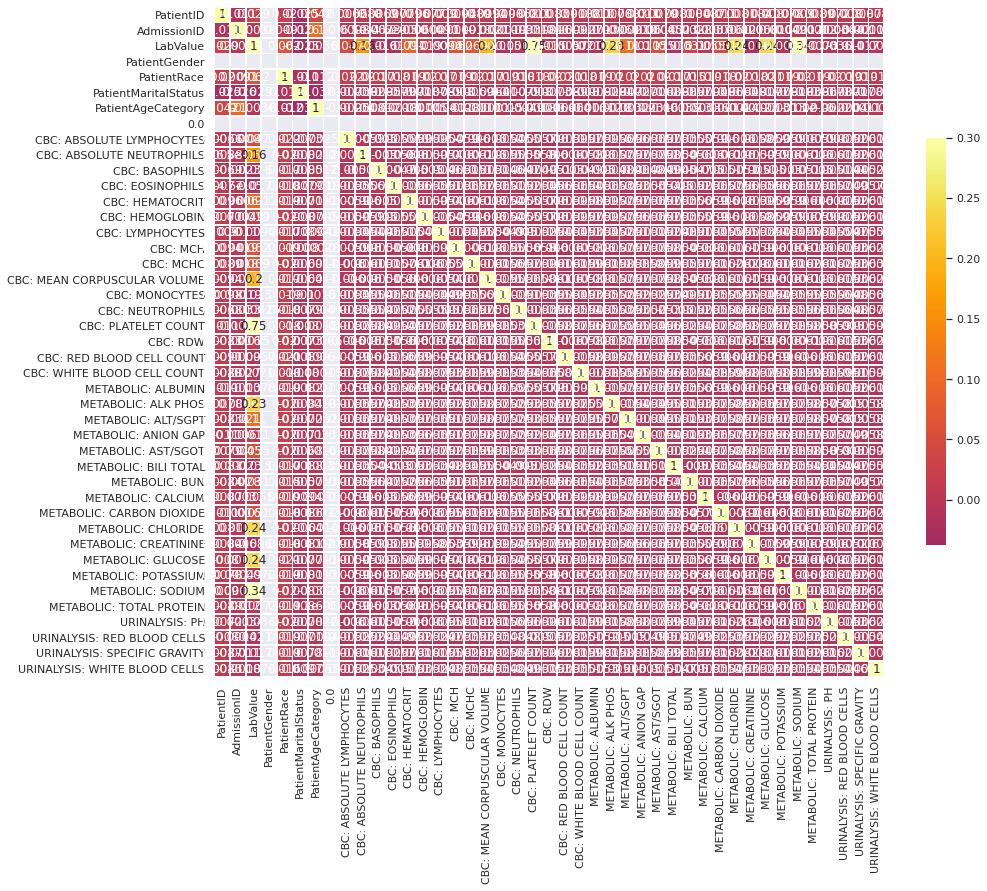

In [160]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_male,cmap='inferno',vmax=.3,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5},annot=True)

In [161]:
data1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221174 entries, 0 to 451436
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      221174 non-null  int64          
 1   AdmissionID                    221174 non-null  int64          
 2   LabName                        221174 non-null  object         
 3   LabValue                       221174 non-null  float64        
 4   PatientGender                  221174 non-null  int64          
 5   PatientDateOfBirth             221174 non-null  object         
 6   PatientRace                    221174 non-null  int64          
 7   PatientMaritalStatus           221174 non-null  int64          
 8   AdmissionDuration              221174 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           221174 non-null  object         
 10  PrimaryDiagnosisDescription    221174 non-null  object  

In [162]:
data1.size

10616352

In [163]:
data1.shape

(221174, 48)

In [164]:
data1.columns

Index([                    'PatientID',                   'AdmissionID',
                             'LabName',                      'LabValue',
                       'PatientGender',            'PatientDateOfBirth',
                         'PatientRace',          'PatientMaritalStatus',
                   'AdmissionDuration',          'PrimaryDiagnosisCode',
         'PrimaryDiagnosisDescription',            'PatientAgeCategory',
                                   0.0,     'CBC: ABSOLUTE LYMPHOCYTES',
           'CBC: ABSOLUTE NEUTROPHILS',                'CBC: BASOPHILS',
                    'CBC: EOSINOPHILS',               'CBC: HEMATOCRIT',
                     'CBC: HEMOGLOBIN',              'CBC: LYMPHOCYTES',
                            'CBC: MCH',                     'CBC: MCHC',
        'CBC: MEAN CORPUSCULAR VOLUME',                'CBC: MONOCYTES',
                    'CBC: NEUTROPHILS',           'CBC: PLATELET COUNT',
                            'CBC: RDW',     'CBC: R

# 24) Define X and y variables

In [165]:
X=data1.loc[:,['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory','CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]
X

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451422,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451423,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451434,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451435,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
type(X)

pandas.core.frame.DataFrame

In [167]:
y=data1.PrimaryDiagnosisCode
y

0         H30.811
1         H30.811
2         H30.811
3         H30.811
4         H30.811
           ...   
451422        D32
451423    F16.151
451434      H67.2
451435      C32.1
451436        M88
Name: PrimaryDiagnosisCode, Length: 221174, dtype: object

In [168]:
type(y)

pandas.core.series.Series

# 25) Split the data into test and train MALE dataframe


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.7,random_state=10)

print(" X train shape = ",X_train.shape)
print(" X test shape = ",X_test.shape)
print(" y train shape = ",y_train.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (66352, 39)
 X test shape =  (154822, 39)
 y train shape =  (66352,)
 y test shape =  (154822,)


In [171]:
X_train.head()

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
151445,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114771,0,3,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422217,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187595,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
X_test.head()

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
56801,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,0.0
435175,0,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98798,0,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311111,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56152,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0



# 26) Using Principal Component Analysis (PCA) technique for dimensionality reduction

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca_male=PCA(svd_solver='auto',random_state=0)
X=pd.DataFrame(pca_male.fit_transform(X))

In [175]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-1.782883,-0.928007,-0.513738,-0.831323,-0.821223,-0.748012,-0.769530,39.699883,0.651937,0.108728,0.062108,0.025278,0.024149,0.008096,-0.011161,0.632465,-0.328642,0.195998,0.003636,-0.008411,-0.012559,-0.009771,-0.011806,-0.012743,0.357641,-0.003363,-0.007099,-0.005827,-0.007567,-0.005677,-0.004833,-0.002766,-0.001691,-0.001460,-0.000952,-0.001384,-0.000612,-0.000191,1.060338e-12
1,-1.746744,-0.838791,-0.419783,-0.675455,-0.656408,-0.540584,-0.438695,-0.281694,-0.267610,-0.209845,-0.195415,-0.159262,-0.187263,-0.172784,-0.106192,0.759500,-0.197506,-0.047751,-0.107952,-0.079600,-0.070626,-0.052241,-0.061537,-0.050587,0.339933,-0.042474,-0.038367,-0.032250,-0.038608,-0.026364,-0.023317,-0.016007,-0.017052,-0.022530,0.869539,0.209308,0.001678,0.000181,1.102924e-18
2,-2.041444,-2.102034,129.671736,30.729365,8.899478,1.579543,0.585752,0.180172,0.145147,0.089902,0.079047,0.058968,0.069911,0.058978,0.032095,0.559649,-0.403260,0.333030,0.067186,0.033731,0.022859,0.016638,0.019209,0.011208,0.351523,0.021004,0.012588,0.010743,0.011896,0.007096,0.006328,0.004428,0.002330,0.002076,0.001100,0.001861,0.000867,0.000281,9.964982e-19
3,-1.750558,-0.847347,-0.427790,-0.688652,-0.670101,-0.555935,-0.457456,-0.307109,-0.299246,-0.251045,-0.242657,-0.208463,-0.250934,-0.243602,-0.220864,1.248499,0.529852,-1.867898,14.748747,0.255198,0.090979,0.039969,0.042273,0.020969,0.346784,0.026681,0.013339,0.009926,0.010504,0.004925,0.003885,0.002388,0.001050,0.000939,0.000433,0.000805,0.000380,0.000124,8.324198e-19
4,-1.746967,-0.839288,-0.420244,-0.676216,-0.657196,-0.541463,-0.439757,-0.283082,-0.269302,-0.211930,-0.197733,-0.161571,-0.190197,-0.175903,-0.109797,0.767777,-0.190014,-0.064011,-0.117588,-0.088917,-0.082493,-0.066256,-0.080006,-0.072233,0.338952,-0.075044,-0.106655,-0.330248,2.744688,0.018542,0.003294,-0.002645,-0.002610,-0.002327,-0.001488,-0.002239,-0.001035,-0.000330,2.347087e-19


In [176]:
pca_male.explained_variance_

array([5.55441152e+02, 1.19743006e+02, 6.45220873e+01, 6.30099770e+01,
       5.91048762e+01, 4.36962174e+01, 2.93753762e+01, 1.44702132e+01,
       1.13020447e+01, 7.22231915e+00, 6.08478348e+00, 4.97780222e+00,
       4.64939847e+00, 4.00795224e+00, 2.20213571e+00, 1.43834214e+00,
       1.32030196e+00, 1.26992264e+00, 1.07713180e+00, 7.75339438e-01,
       5.49400635e-01, 3.89488279e-01, 3.60050550e-01, 2.77448206e-01,
       2.62188703e-01, 2.27270574e-01, 1.61077898e-01, 1.27525159e-01,
       1.18399767e-01, 7.68141186e-02, 5.46819967e-02, 2.46499688e-02,
       6.19056537e-03, 4.73341090e-03, 3.14082192e-03, 3.05171946e-03,
       8.65109029e-04, 1.07795242e-04, 5.08595058e-30])

In [177]:
pca_male.explained_variance_ratio_

array([5.56366131e-01, 1.19942414e-01, 6.46295362e-02, 6.31149078e-02,
       5.92033038e-02, 4.37689849e-02, 2.94242951e-02, 1.44943105e-02,
       1.13208660e-02, 7.23434651e-03, 6.09491649e-03, 4.98609177e-03,
       4.65714113e-03, 4.01462670e-03, 2.20580294e-03, 1.44073742e-03,
       1.32250066e-03, 1.27203745e-03, 1.07892555e-03, 7.76630614e-04,
       5.50315554e-04, 3.90136896e-04, 3.60650144e-04, 2.77910242e-04,
       2.62625326e-04, 2.27649048e-04, 1.61346142e-04, 1.27737527e-04,
       1.18596938e-04, 7.69420374e-05, 5.47730589e-05, 2.46910185e-05,
       6.20087454e-06, 4.74129347e-06, 3.14605234e-06, 3.05680150e-06,
       8.66549698e-07, 1.07974754e-07, 5.09442024e-33])

In [178]:
pca_male.n_components_

39

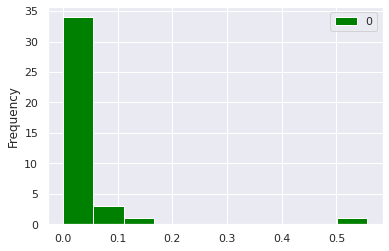

In [179]:
EHR_variance_ratio=pd.DataFrame(pca_male.explained_variance_ratio_)
EHR_variance_ratio.plot(kind='hist',color='green')

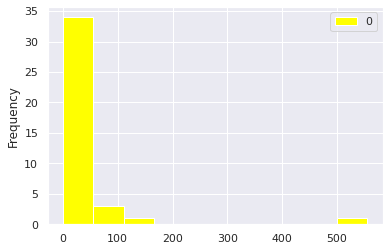

In [180]:
EHR_variance=pd.DataFrame(pca_male.explained_variance_)
EHR_variance.plot(kind='hist',color='yellow')

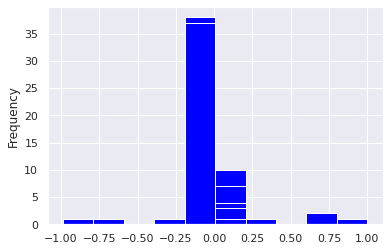

In [181]:
EHR_variance=pd.DataFrame(pca_male.components_)
EHR_variance.plot(kind='hist',color='blue',legend=False)

# 27) Using different Machine Learning classification algorithms



### 1) Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [183]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [184]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
y_train_predict=model_LR.predict(X_train)
y_predict= model_LR.predict(X_test)

In [185]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


col_0,B46.0,B97.34,B97.6,C02.0,C16,C33,C34.0,C38.2,C56.2,C67.5,C70,C79.82,C90.10,C92.60,D29.4,D33.4,D37.03,D37.031,D37.4,D47.Z1,D57.1,D73,E11.339,E11.341,E74.4,E80,F06.3,F31.64,F33.2,F64,G47.52,G54.4,H02.87,H16.441,H74.1,I97.110,J14,J43.0,J44.1,K50.8,...,M05.442,M05.552,M05.7,M06.241,M06.261,M10.32,M11.01,M11.061,M12.121,M26.6,M53.3,M63.8,M90.612,M90.63,M90.662,N71,N71.0,N71.1,O08.5,O10.212,O10.31,O10.313,O24.13,O98.63,O98.72,O99.413,O99.612,O99.712,O9A.11,Q61,Q62,Q89.1,R94.2,T74.31,Z11,Z12.2,Z13.0,Z13.21,Z13.4,Z45.02
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A18.7,0,0,0,0,0,0,0,6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
A21.2,0,0,0,3,0,0,0,8,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,2,0,0,0,4,0,0,0,3,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,1,0,0,0
A22.1,1,0,0,2,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0,0,2,7,3,0,0,0,0,0,0,0,0,0,0,0,1,2,1,4,0,0,0,0,0,0,0,1,0,0,1
A28.1,0,0,0,2,0,0,0,8,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,0,0,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,2,5,0,3,0,0,0,0,0,0,0,1,0,0,2
A31.0,1,0,0,2,0,0,0,8,0,0,0,0,5,0,0,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z95.5,1,0,0,0,0,0,0,7,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0,0,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,2,0,0,1
Z95.810,0,0,0,1,0,0,0,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,6,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,3
Z95.820,0,0,0,1,0,0,0,1,0,0,0,0,8,0,0,1,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,5,1,2,0,0,0,0,0,0,0,2,0,0,3


In [186]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  4.373643597781529
Accuracy score of Testing =  2.8161372414773096
Precision score =  1.4774793528007562
Recall score =  2.8161372414773096
F1 score =  1.4099737406790718


## 2) SGDClassifier

In [187]:
from sklearn.linear_model import SGDClassifier

In [188]:
model_SGD=SGDClassifier(random_state=10)
model_SGD.fit(X_train,y_train)
y_train_predict=model_SGD.predict(X_train)
y_predict= model_SGD.predict(X_test)

In [189]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


col_0,B97.34,B97.6,C02.0,C16,C33,C34.0,C38.2,C90.10,D29.4,D33.4,D37.03,D37.031,D37.4,D47.Z1,D57.1,D73,E74.4,E80,F06.3,F31.64,F33.2,H02.87,H16.441,I97.110,J14,J43.0,K13.0,K50.8,K71.0,M02.371,M05.331,M05.41,M05.442,M05.552,M06.261,M11.01,M11.061,M12.121,M63.8,M90.612,M90.63,M90.662,N71.0,O10.212,O10.313,O98.72,O99.712,O9A.11,Q61,Q62,Q89.1,R94.2,T74.31,Z11,Z12.2,Z13.0,Z13.21,Z13.4
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A18.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A21.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,2,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,1,8,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,0,0
A22.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,2,8,9,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0
A28.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,1,6,7,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0
A31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,5,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z95.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,5,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Z95.810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,1,2,13,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0
Z95.820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,1,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,2,15,0,1,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0


In [190]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  2.688690619725102
Accuracy score of Testing =  1.9254369534045548
Precision score =  0.977376940343993
Recall score =  1.9254369534045548
F1 score =  0.5437630965656327


# 28) Final data of the dataframe MALE saved inside the local system

In [191]:
data1.to_csv("/content/drive/My Drive/Colab Notebooks/Final_Data_After_Training_Model_Male.csv")

# Performing Data Modelling on dataframe FEMALE

In [192]:
data2.head()

,PatientID,AdmissionID,LabName,LabValue,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,AdmissionDuration,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
781,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: ALBUMIN,3.0,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,CBC: MCH,32.9,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: AST/SGOT,28.9,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,CBC: BASOPHILS,0.1,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,BF716E0C-BA18-4AB6-A654-82A9A0E29A79,1,METABOLIC: GLUCOSE,123.2,Female,1976-12-05,African American,Unknown,6 days,M06.052,Rheumatoid arthritis without rheumatoid factor...,Adults,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 29) Label Encoding for converting categorical variables to numericals

In [193]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

data2['PatientID']=enc.fit_transform(data2['PatientID'])
data2['PatientGender']=enc.fit_transform(data2['PatientGender'])
data2['PatientMaritalStatus']=enc.fit_transform(data2['PatientMaritalStatus'])
data2['PatientRace']=enc.fit_transform(data2['PatientRace'])
data2['PatientAgeCategory']=enc.fit_transform(data2['PatientAgeCategory'])

### Displaying the encoded values of the categorical features

In [194]:
Counter(data2.PatientAgeCategory)

Counter({0: 86652, 1: 139262, 2: 4358})

In [195]:
Counter(data2.PatientGender)

Counter({0: 230272})

In [196]:
Counter(data2.PatientRace)

Counter({0: 29514, 1: 58877, 2: 27677, 3: 114204})

In [197]:
Counter(data2.PatientMaritalStatus)

Counter({0: 24458, 1: 96287, 2: 12451, 3: 76948, 4: 18289, 5: 1839})

# 30) Finding correlations between different columns in Lab group and generating correlation matrix

In [198]:
corr_female=data2.corr()
corr_female

,PatientID,AdmissionID,LabValue,PatientGender,PatientRace,PatientMaritalStatus,PatientAgeCategory,0.0,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
PatientID,1.000000,0.044069,0.043639,NaN,-0.063830,0.080829,0.022357,NaN,0.015473,0.014081,0.014196,0.012565,0.013239,0.012917,0.010892,0.014260,0.013193,0.015826,0.010927,0.011853,0.014108,0.015316,0.014546,0.013741,0.012274,0.011027,0.011046,0.013724,0.012682,0.011246,0.010980,0.011806,0.013084,0.014335,0.014263,0.013210,0.012017,0.014895,0.014943,0.014440,0.010526,0.014077,0.011180
AdmissionID,0.044069,1.000000,-0.010811,NaN,-0.006056,0.036714,0.115026,NaN,-0.005013,-0.002540,-0.001534,-0.002227,-0.004419,-0.003525,-0.004270,-0.002997,-0.002722,-0.002329,-0.003829,-0.004787,-0.001968,-0.003593,-0.001373,-0.002974,-0.003777,-0.003638,-0.005765,-0.003461,-0.003277,-0.003919,-0.006016,-0.003468,-0.003669,-0.004865,-0.003073,-0.005240,-0.004413,-0.003314,-0.004680,-0.002748,-0.002765,-0.002136,-0.003837
LabValue,0.043639,-0.010811,1.000000,NaN,0.018879,0.070512,-0.011374,NaN,0.048551,0.160689,-0.013205,-0.013874,0.093079,0.020937,-0.007140,0.063910,0.069981,0.200789,-0.012751,0.002147,0.752283,0.017474,-0.002924,0.004762,-0.004883,0.238599,0.106231,0.013204,0.056104,-0.012363,0.032608,0.007931,0.052745,0.244245,-0.013795,0.242488,-0.004569,0.338443,0.003081,-0.000936,-0.009045,-0.013767,-0.005513
PatientGender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientRace,-0.063830,-0.006056,0.018879,NaN,1.000000,0.004377,0.009741,NaN,0.005995,0.004484,0.004744,0.004703,0.007195,0.005636,0.007123,0.006817,0.006908,0.005129,0.006390,0.005422,0.006537,0.005829,0.006109,0.005912,0.006958,0.006705,0.006208,0.006410,0.006509,0.004877,0.007711,0.007555,0.005283,0.004420,0.005595,0.006737,0.008150,0.004233,0.007168,0.007016,0.006958,0.006989,0.007678
PatientMaritalStatus,0.080829,0.036714,0.070512,NaN,0.004377,1.000000,0.046356,NaN,0.022479,0.022711,0.021173,0.021660,0.023095,0.020403,0.019838,0.023108,0.021036,0.022910,0.020522,0.019196,0.022671,0.021693,0.021471,0.020604,0.020579,0.019608,0.019121,0.021200,0.021930,0.017574,0.018926,0.021589,0.023501,0.021274,0.022808,0.023093,0.020513,0.023886,0.021050,0.022873,0.017231,0.021451,0.020506
PatientAgeCategory,0.022357,0.115026,-0.011374,NaN,0.009741,0.046356,1.000000,NaN,-0.003278,-0.003671,-0.001687,-0.001932,-0.002189,-0.003443,-0.005532,-0.002978,-0.004580,-0.003013,-0.003628,-0.003863,-0.003053,-0.002894,-0.002557,-0.004386,-0.005232,-0.004905,-0.005016,-0.002689,-0.003631,-0.004716,-0.005230,-0.002552,-0.003347,-0.002721,-0.003631,-0.002853,-0.004701,-0.005008,-0.003719,-0.002735,-0.003084,-0.003282,-0.001991
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBC: ABSOLUTE LYMPHOCYTES,0.015473,-0.005013,0.048551,NaN,0.005995,0.022479,-0.003278,NaN,1.000000,-0.005089,-0.004251,-0.004649,-0.005071,-0.005041,-0.004668,-0.005070,-0.005127,-0.005120,-0.004570,-0.004612,-0.004918,-0.005110,-0.004947,-0.004861,-0.004959,-0.004850,-0.004751,-0.004763,-0.004889,-0.004434,-0.004713,-0.005053,-0.005030,-0.005124,-0.005031,-0.005016,-0.004990,-0.005123,-0.005

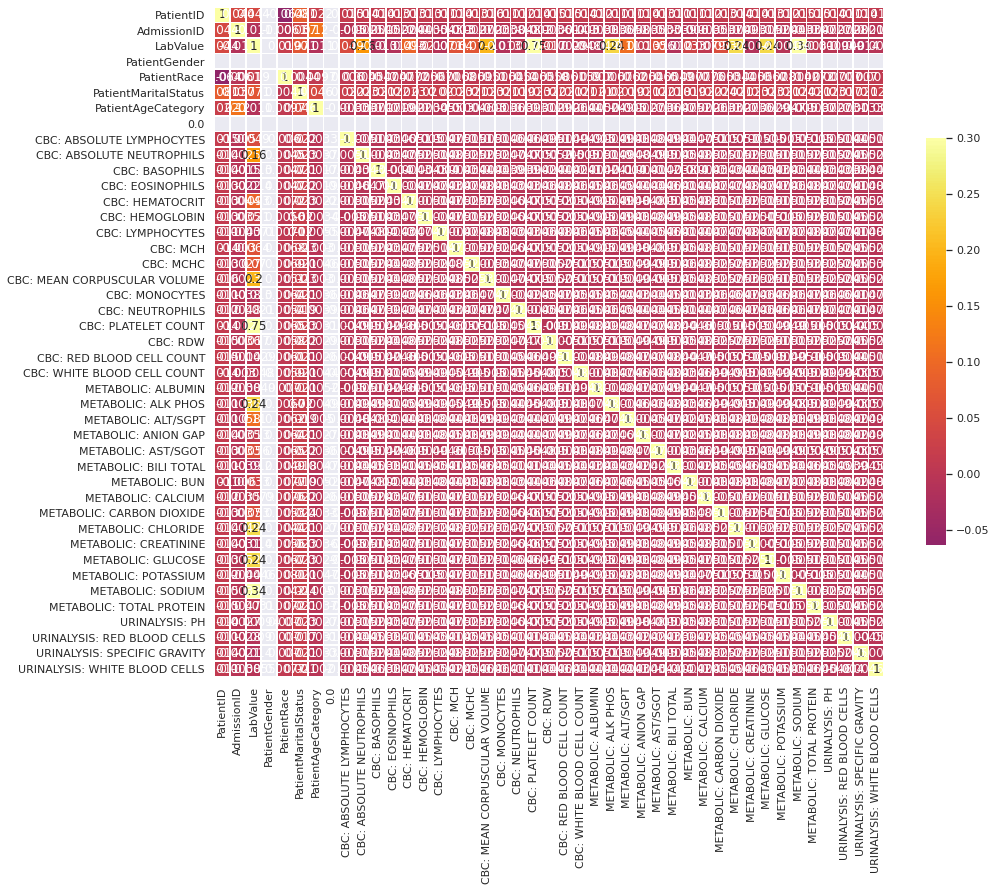

In [199]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_female,cmap='inferno',vmax=.3,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5},annot=True)

In [200]:
data2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230272 entries, 781 to 451445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   PatientID                      230272 non-null  int64          
 1   AdmissionID                    230272 non-null  int64          
 2   LabName                        230272 non-null  object         
 3   LabValue                       230272 non-null  float64        
 4   PatientGender                  230272 non-null  int64          
 5   PatientDateOfBirth             230272 non-null  object         
 6   PatientRace                    230272 non-null  int64          
 7   PatientMaritalStatus           230272 non-null  int64          
 8   AdmissionDuration              230272 non-null  timedelta64[ns]
 9   PrimaryDiagnosisCode           230272 non-null  object         
 10  PrimaryDiagnosisDescription    230272 non-null  object

# 31) Define X and y variables

In [201]:
X=data2.loc[:,['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory','CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]
X

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
781,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0,4,0,0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451441,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451442,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451443,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451444,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
X 
  

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
781,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0,4,0,0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451441,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451442,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451443,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451444,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
y=data2.PrimaryDiagnosisCode
y

781       M06.052
782       M06.052
783       M06.052
784       M06.052
785       M06.052
           ...   
451441    M90.631
451442     E09.21
451443     C57.22
451444     C92.12
451445      D32.0
Name: PrimaryDiagnosisCode, Length: 230272, dtype: object

# 32) Using train test split  to split FEMALE dataframe

In [204]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.7,random_state=10)
print(" X train shape = ",X_train.shape)
print(" X test shape = ",X_test.shape)
print(" y train shape = ",y_train.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (69081, 39)
 X test shape =  (161191, 39)
 y train shape =  (69081,)
 y test shape =  (161191,)


# 33) Principal Component Analysis (PCA) for dimensionality reduction

In [205]:
pca=PCA(svd_solver='auto',random_state=0)
X=pd.DataFrame(pca.fit_transform(X))

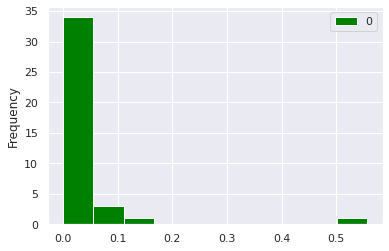

In [206]:
EHR_variance_ratio=pd.DataFrame(pca.explained_variance_ratio_)
EHR_variance_ratio.plot(kind='hist',color='green')

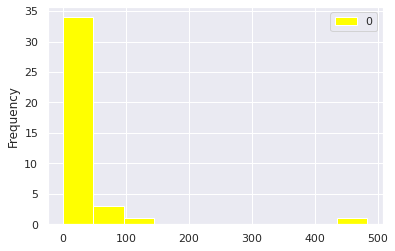

In [207]:
EHR_variance=pd.DataFrame(pca.explained_variance_)
EHR_variance.plot(kind='hist',color='yellow')

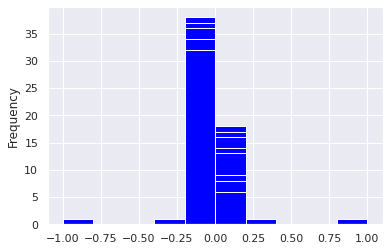

In [208]:
EHR_variance=pd.DataFrame(pca.components_)
EHR_variance.plot(kind='hist',color='blue',legend=False)

# 34) Machine Learning Classification Algorithms used for model prediction

In [209]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

## 1) Logistic Regression

In [210]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
y_train_predict=model_LR.predict(X_train)
y_predict= model_LR.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  5.046250054284101
Accuracy score of Testing =  3.2359126750252805
Precision score =  1.5642117207175288
Recall score =  3.2359126750252805
F1 score =  1.6060463154708038


## 2) SGD Classifier

In [211]:
model_SGD=SGDClassifier(random_state=10)
model_SGD.fit(X_train,y_train)
y_train_predict=model_SGD.predict(X_train)
y_predict= model_SGD.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  2.168468898828911
Accuracy score of Testing =  1.4454901328237928
Precision score =  1.3510077939684224
Recall score =  1.4454901328237928
F1 score =  0.668295570085111


# 35) Saving the final data of the dataframe FEMALE inside the local system


In [212]:
data2.to_csv("/content/drive/My Drive/Colab Notebooks/Final_Data_After_Training_Model_Female.csv")

# 36) Load the Model using joblib

#### Load and save model for Logistic Regression

In [213]:
import pickle,joblib
joblib.dump(model_LR,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR.pkl']

In [214]:
model_LR=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR.pkl')  

#### Load and save model for SGD Classifier

In [215]:
joblib.dump(model_SGD,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD.pkl']

In [216]:
model_SGD=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD.pkl')  

In [217]:
model_LR.predict([[0,2,3,2,20.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   8.0,4.0,1.01,5.0]])
# Inputs
# [['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory',
# 'CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
# 'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
# 'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
# 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
# 'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
# 'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
# 'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
# 'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]

array(['M90.561'], dtype=object)

In [218]:
model_SGD.predict([[0,3,4,3,40.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   14.0,4.0,1.01,4.0]])

array(['C94.02'], dtype='<U7')

# 37) Classification for MALE dataframe using Primary Diagnosis Description as final target variable

### Defining X and y variables

In [219]:
X=data1.loc[:,['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory','CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]
X

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451422,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451423,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451434,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451435,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
y =data1['PrimaryDiagnosisDescription']
y

0                               Harada's disease, right eye
1                               Harada's disease, right eye
2                               Harada's disease, right eye
3                               Harada's disease, right eye
4                               Harada's disease, right eye
                                ...                        
451422                          Benign neoplasm of meninges
451423    Hallucinogen abuse with hallucinogen-induced p...
451434    Otitis media in diseases classified elsewhere,...
451435                   Malignant neoplasm of supraglottis
451436         Osteitis deformans [Paget's disease of bone]
Name: PrimaryDiagnosisDescription, Length: 221174, dtype: object

## Splitting the datasets

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=10) 

In [222]:
print(" X train shape = ",X_train.shape)
print(" X test shape = ",X_test.shape)
print(" y train shape = ",y_train.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (66352, 39)
 X test shape =  (154822, 39)
 y train shape =  (66352,)
 y test shape =  (154822,)


In [223]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

### Using Logistic Regression





In [224]:
model_LR1 = LogisticRegression() 
model_LR1.fit(X_train, y_train) 
y_train_predict=model_LR1.predict(X_train)
y_predict= model_LR1.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  4.351036894140342
Accuracy score of Testing =  2.805802792884732
Precision score =  1.4725722390714466
Recall score =  2.805802792884732
F1 score =  1.413693169320418


### Using SGD Classifier

In [225]:
model_SGD1=SGDClassifier(random_state=10)
model_SGD1.fit(X_train,y_train)
y_train_predict=model_SGD1.predict(X_train)
y_predict= model_SGD1.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  1.1876054979503254
Accuracy score of Testing =  0.7214736923693016
Precision score =  1.234956904827008
Recall score =  0.7214736923693016
F1 score =  0.687027690081259


## Save and load the model



In [226]:
joblib.dump(model_LR1,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl']

In [227]:
model_LR1=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl')  

In [228]:
model_LR1.predict([[1,2,3,2,20.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   8.0,4.0,1.01,5.0]])
# Inputs
# [['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory',
# 'CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
# 'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
# 'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
# 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
# 'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
# 'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
# 'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
# 'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]

array(['Bipolar disorder, current episode mixed, severe, with psychotic features'],
      dtype=object)

In [229]:
joblib.dump(model_SGD1,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl']

In [230]:
model_SGD1=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl')  

In [231]:
model_SGD1.predict([[1,3,4,3,40.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   14.0,4.0,1.01,4.0]])

array(['Pneumonia due to Hemophilus influenzae'], dtype='<U139')

# 38) Classification FEMALE dataframe using Primary Diagnosis Description as the final target variable

#### Defining X and y variables

In [232]:
X=data2.loc[:,['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory','CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]
X

,PatientGender,PatientMaritalStatus,PatientRace,PatientAgeCategory,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
781,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0,4,0,0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451441,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451442,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451443,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451444,0,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
y = data2.PrimaryDiagnosisDescription 
y

781       Rheumatoid arthritis without rheumatoid factor...
782       Rheumatoid arthritis without rheumatoid factor...
783       Rheumatoid arthritis without rheumatoid factor...
784       Rheumatoid arthritis without rheumatoid factor...
785       Rheumatoid arthritis without rheumatoid factor...
                                ...                        
451441    Osteitis deformans in neoplastic diseases, rig...
451442    Drug or chemical induced diabetes mellitus wit...
451443            Malignant neoplasm of left round ligament
451444    Chronic myeloid leukemia, BCR/ABL-positive, in...
451445                 Benign neoplasm of cerebral meninges
Name: PrimaryDiagnosisDescription, Length: 230272, dtype: object

### Splitting the datasets

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=10) 

In [235]:
print(" X train shape = ",X_train.shape)
print(" X test shape = ",X_test.shape)
print(" y train shape = ",y_train.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (69081, 39)
 X test shape =  (161191, 39)
 y train shape =  (69081,)
 y test shape =  (161191,)


In [236]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

## Using Logistic Regression

In [237]:
model_LR1 = LogisticRegression() 
model_LR1.fit(X_train, y_train) 
y_train_predict=model_LR1.predict(X_train)
y_predict= model_LR1.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  5.046250054284101
Accuracy score of Testing =  3.2340515289315164
Precision score =  1.5601608058337317
Recall score =  3.2340515289315164
F1 score =  1.603777193624316


## Using SGD Classifier

In [238]:
model_SGD1=SGDClassifier(random_state=10)
model_SGD1.fit(X_train,y_train)
y_train_predict=model_SGD1.predict(X_train)
y_predict= model_SGD1.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy score of Training =  2.0352919037072423
Accuracy score of Testing =  1.2934965351663554
Precision score =  1.3751740553783096
Recall score =  1.2934965351663554
F1 score =  0.6501376259805721


## Save and load the model

In [239]:
joblib.dump(model_LR1,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl']

In [240]:
model_LR1=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_LR1.pkl')  

In [241]:
model_LR1.predict([[0,2,3,2,20.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   8.0,4.0,1.01,5.0]])
# Inputs
# [['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory',
# 'CBC: ABSOLUTE LYMPHOCYTES','CBC: ABSOLUTE NEUTROPHILS',
# 'CBC: BASOPHILS','CBC: EOSINOPHILS', 'CBC: HEMATOCRIT','CBC: HEMOGLOBIN','CBC: LYMPHOCYTES',
# 'CBC: MCH','CBC: MCHC','CBC: MEAN CORPUSCULAR VOLUME','CBC: MONOCYTES','CBC: NEUTROPHILS','CBC: PLATELET COUNT',
# 'CBC: RDW','CBC: RED BLOOD CELL COUNT','CBC: WHITE BLOOD CELL COUNT',
# 'METABOLIC: ALBUMIN','METABOLIC: ALK PHOS','METABOLIC: ALT/SGPT','METABOLIC: ANION GAP','METABOLIC: AST/SGOT','METABOLIC: BILI TOTAL',
# 'METABOLIC: BUN','METABOLIC: CALCIUM','METABOLIC: CARBON DIOXIDE','METABOLIC: CHLORIDE','METABOLIC: CREATININE','METABOLIC: GLUCOSE',
# 'METABOLIC: POTASSIUM','METABOLIC: SODIUM','METABOLIC: TOTAL PROTEIN',
# 'URINALYSIS: PH','URINALYSIS: RED BLOOD CELLS','URINALYSIS: SPECIFIC GRAVITY','URINALYSIS: WHITE BLOOD CELLS']]

array(['Encounter for checking and testing of cardiac pacemaker pulse generator [battery]'],
      dtype=object)

In [242]:
joblib.dump(model_SGD1,'/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl')

['/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl']

In [243]:
model_SGD1=joblib.load('/content/drive/My Drive/Colab Notebooks/EHR_Trained_Model_SGD1.pkl')  

In [244]:
model_SGD1.predict([[0,3,4,3,40.0,45.0,0.1,
                   0.4,35.5,133.0,3.2,33.2,35.5,95.0,
                   0.6,34.1,200.0,14.5,5.6,8.2,
                   4.0,120.0,35.0,20.0,5.0,30.0,13.0,
                   9.0,27.2,96.0,0.8,4.0,30.0,7.0,9.1,
                   14.0,4.0,1.01,4.0]])

array(['Acute erythroid leukemia, in relapse'], dtype='<U139')